/var/folders/fx/n_3y56090wn7h1vq2k2fk4880000gn/T/ipykernel_50455/1868958768.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df["model_name"], rotation=45, ha='right', fontsize=10)


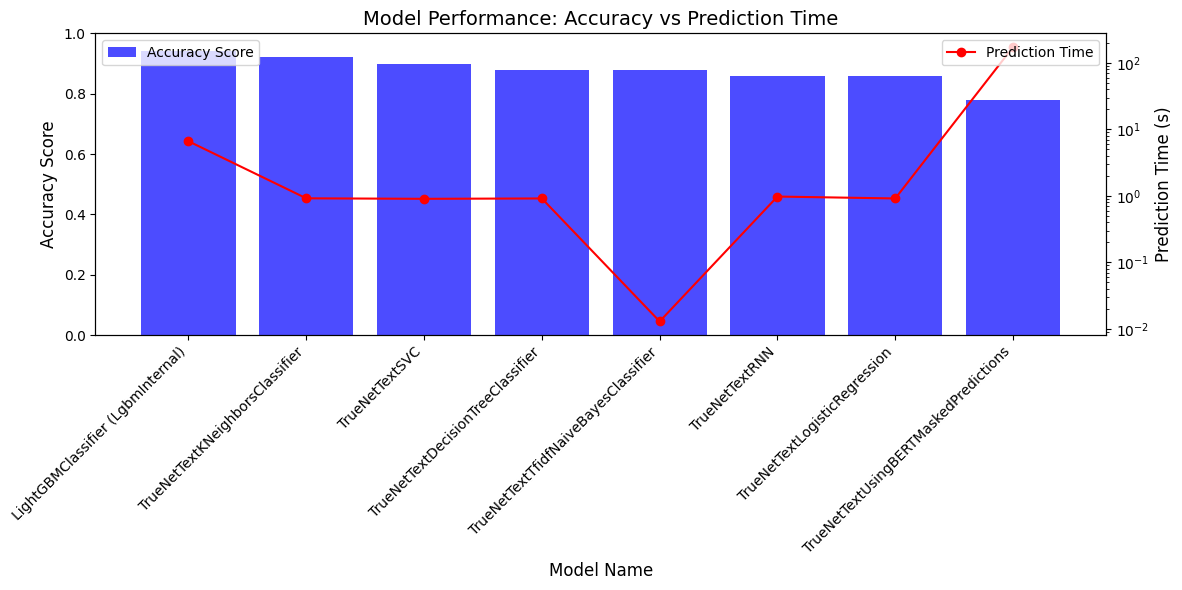

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the image provided by the user
data = {
    "model_name": [
        "LightGBMClassifier (LgbmInternal)",
        "TrueNetTextKNeighborsClassifier",
        "TrueNetTextSVC",
        "TrueNetTextDecisionTreeClassifier",
        "TrueNetTextTfidfNaiveBayesClassifier",
        "TrueNetTextRNN",
        "TrueNetTextLogisticRegression",
        "TrueNetTextUsingBERTMaskedPredictions"
    ],
    "accuracy_score": [0.94, 0.92, 0.90, 0.88, 0.88, 0.86, 0.86, 0.78],
    "predictions_time": [6.621026, 0.917139, 0.901547, 0.912761, 0.012923, 0.975066, 0.912609, 172.696304]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot a bar chart for better visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create bars for accuracy scores
ax1.bar(df["model_name"], df["accuracy_score"], color="blue", alpha=0.7, label="Accuracy Score")
ax1.set_ylabel("Accuracy Score", fontsize=12)
ax1.set_ylim(0, 1)
ax1.set_xlabel("Model Name", fontsize=12)
ax1.set_xticklabels(df["model_name"], rotation=45, ha='right', fontsize=10)

# Create a line plot for prediction times
ax2 = ax1.twinx()
ax2.plot(df["model_name"], df["predictions_time"], color="red", marker="o", label="Prediction Time")
ax2.set_ylabel("Prediction Time (s)", fontsize=12)
ax2.set_yscale("log")  # Use a logarithmic scale for better visibility of differences

# Add title and legends
plt.title("Model Performance: Accuracy vs Prediction Time", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


In [3]:
df_metrics = pd.read_csv("/Users/lina/code/detect_ai_content/detect_ai_content/streamlit/data/estimators_benchmark_50_predictions.csv")


In [4]:
df.head()


,model_name,accuracy_score,predictions_time
0,LightGBMClassifier (LgbmInternal),0.94,6.621026
1,TrueNetTextKNeighborsClassifier,0.92,0.917139
2,TrueNetTextSVC,0.90,0.901547
3,TrueNetTextDecisionTreeClassifier,0.88,0.912761
4,TrueNetTextTfidfNaiveBayesClassifier,0.88,0.012923


/var/folders/fx/n_3y56090wn7h1vq2k2fk4880000gn/T/ipykernel_50455/1555376752.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_metrics["abbreviated_name"], rotation=45, ha='right', fontsize=10)


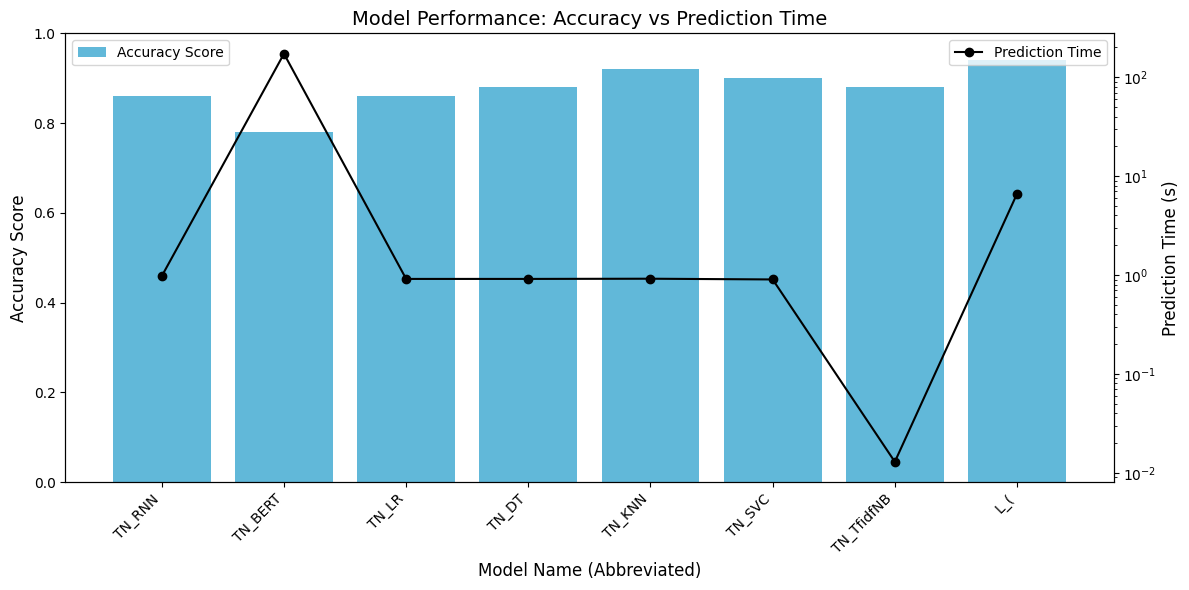

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Re-define the function to abbreviate model names
def abbreviate_model_name(name):
    name = name.replace("TrueNetText", "TN_")  # Replace "TrueNetText" with "TN_"
    name = name.replace("Classifier", "")  # Remove "Classifier"
    parts = name.split()
    # Use abbreviations or core identifiers for the model type
    if "LGBM" in name:
        return "TN_LGBM"
    elif "KNeighbors" in name:
        return "TN_KNN"
    elif "SVC" in name:
        return "TN_SVC"
    elif "DecisionTree" in name:
        return "TN_DT"
    elif "TfidfNaiveBayes" in name:
        return "TN_TfidfNB"
    elif "RNN" in name:
        return "TN_RNN"
    elif "LogisticRegression" in name:
        return "TN_LR"
    elif "BERTMaskedPredictions" in name:
        return "TN_BERT"
    else:
        return "_".join([p[0].upper() for p in parts])  # Fallback: Use initials

# Apply the abbreviation function to df_metrics
df_metrics["abbreviated_name"] = df_metrics["model_name"].apply(abbreviate_model_name)

# Use a single color for all bars (e.g., light blue)
single_color = sns.color_palette("husl", len(df_metrics))[5]  # Color of TN_RNN

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for accuracy scores with a single color
ax1.bar(df_metrics["abbreviated_name"], df_metrics["accuracy_score"], color=single_color, alpha=0.8, label="Accuracy Score")
ax1.set_ylabel("Accuracy Score", fontsize=12)
ax1.set_ylim(0, 1)
ax1.set_xlabel("Model Name (Abbreviated)", fontsize=12)
ax1.set_xticklabels(df_metrics["abbreviated_name"], rotation=45, ha='right', fontsize=10)

# Line plot for prediction times
ax2 = ax1.twinx()
ax2.plot(df_metrics["abbreviated_name"], df_metrics["predictions_time"], color="black", marker="o", label="Prediction Time")
ax2.set_ylabel("Prediction Time (s)", fontsize=12)
ax2.set_yscale("log")  # Logarithmic scale for prediction time

# Add title and legends
plt.title("Model Performance: Accuracy vs Prediction Time", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


